In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.5)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 25

In [5]:
# Import the multiplicity data 
mult_target_PATH = "./data/pgun_qqbar_hadrons_mult_a_0.68_b_0.98_PH_vs_IS_1e6.dat"
mult_base_PATH_v1 = "./data/pgun_qqbar_hadrons_mult_a_0.72_b_0.88_PH_vs_IS_1e6.dat"
mult_base_PATH_v2 = "./data/pgun_qqbar_hadrons_mult_a_0.64_b_1.08_PH_vs_IS_1e6.dat"

weights_base_v1 = "./data/pgun_qqbar_weights_a_0.72_0.68_b_0.88_0.98_PH_vs_IS_1e6.dat"
weights_base_v2 = "./data/pgun_qqbar_weights_a_0.64_0.68_b_1.08_0.98_PH_vs_IS_1e6.dat"

mult_target = np.loadtxt(mult_target_PATH)
mult_base_v1 = np.loadtxt(mult_base_PATH_v1)
mult_base_v2 = np.loadtxt(mult_base_PATH_v2)

weights_base_v1 = np.loadtxt(weights_base_v1)
weights_base_v2 = np.loadtxt(weights_base_v2)

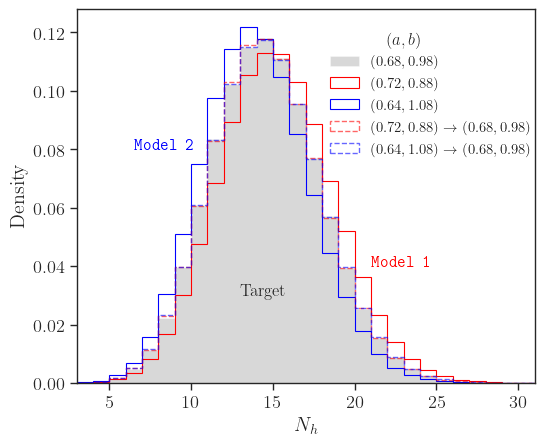

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Extract minimum and maximum bin counts
min_count = min(min(mult_target), min(mult_base_v1), min(mult_base_v2))
max_count = max(max(mult_target), max(mult_base_v1), max(mult_base_v2))

# Create bins
bins = np.linspace(min_count, max_count, int(max_count - min_count + 1))

counts, bins, _ = ax.hist(mult_target, bins = bins, histtype='stepfilled', color='gray', alpha = 0.3, label=r'$(0.68, 0.98)$', density=True)
ax.hist(mult_base_v1, bins=bins, histtype='step', color='red',  density=True, label=r'$(0.72, 0.88)$')
ax.hist(mult_base_v2, bins=bins, histtype='step', color='blue', density=True, label=r'$(0.64, 1.08)$')

ax.hist(mult_base_v1, bins=bins, histtype='step', color='red', label=r'$(0.72, 0.88) \to (0.68, 0.98)$', density=True, alpha = 0.6, weights=weights_base_v1, linewidth = 1.0, linestyle='--')
ax.hist(mult_base_v2, bins=bins, histtype='step', color='blue',label=r'$(0.64, 1.08) \to (0.68, 0.98)$', density=True, alpha = 0.6, weights=weights_base_v2, linewidth = 1.0, linestyle='--')

ax.set_xlabel(r'$N_h$')
ax.set_ylabel(r'$\mathrm{Density}$')

ax.set_xlim(3, 31)

ax.legend(frameon=False, fontsize = 10.5, ncols = 1, bbox_to_anchor=(0.525,.57))
ax.text(22, 0.116, r'$(a,b)$', fontsize = 12)
ax.text(13, 0.03, r'$\mathrm{Target}$', fontsize = 12)
ax.text(6.5, 0.08, r'$\texttt{Model 2}$', color = 'blue', fontsize = 12)
ax.text(21, 0.04, r'$\texttt{Model 1}$', color = 'red', fontsize = 12)
fig.tight_layout()